## 결정트리 (Decision Tree)
---
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [89]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import all_estimators

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use(['seaborn-whitegrid'])

### [1] 데이터 로딩 

In [20]:
# 판다스 데이터프레임으로 받아서 데이터 확인
df_X, df_y = load_breast_cancer(return_X_y=True, as_frame=True)

# bunch 타입 => key로 데이터 가져옴
# cancer = loac_breast_cancer()

In [21]:
df_X.info(), df_X.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None, Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'))

In [22]:
feature_name = df_X.columns

### [2] 학습 & 테스트 데이터 분리

In [23]:
# 데이터를 가져올때 df로 가져왔기 때문에 np로 변경해야함
# values 속성 사용하여 넘파이로 인스턴스 변경
# or to_numpy 사용해서 속성 변경 후 입력
train_X, test_X, train_y, test_y = train_test_split(
    df_X.values, df_y.values, stratify=df_y, random_state = 42
)

In [24]:
print(f"train_X.shape: {train_X.shape}, test_X.shape: {test_X.shape}")

train_X.shape: (426, 30), test_X.shape: (143, 30)


In [25]:
# 모델 객체 생성
dt_model = DecisionTreeClassifier()

### [3] 모델 학습

In [26]:
# 학습용 데이터로 학습 진행
dt_model.fit(train_X, train_y)

DecisionTreeClassifier()

### [4] 평가

In [27]:
train_score = dt_model.score(train_X, train_y)
test_score = dt_model.score(test_X, test_y)

print(f"train_score: {train_score}, test_score: {test_score}")

train_score: 1.0, test_score: 0.916083916083916


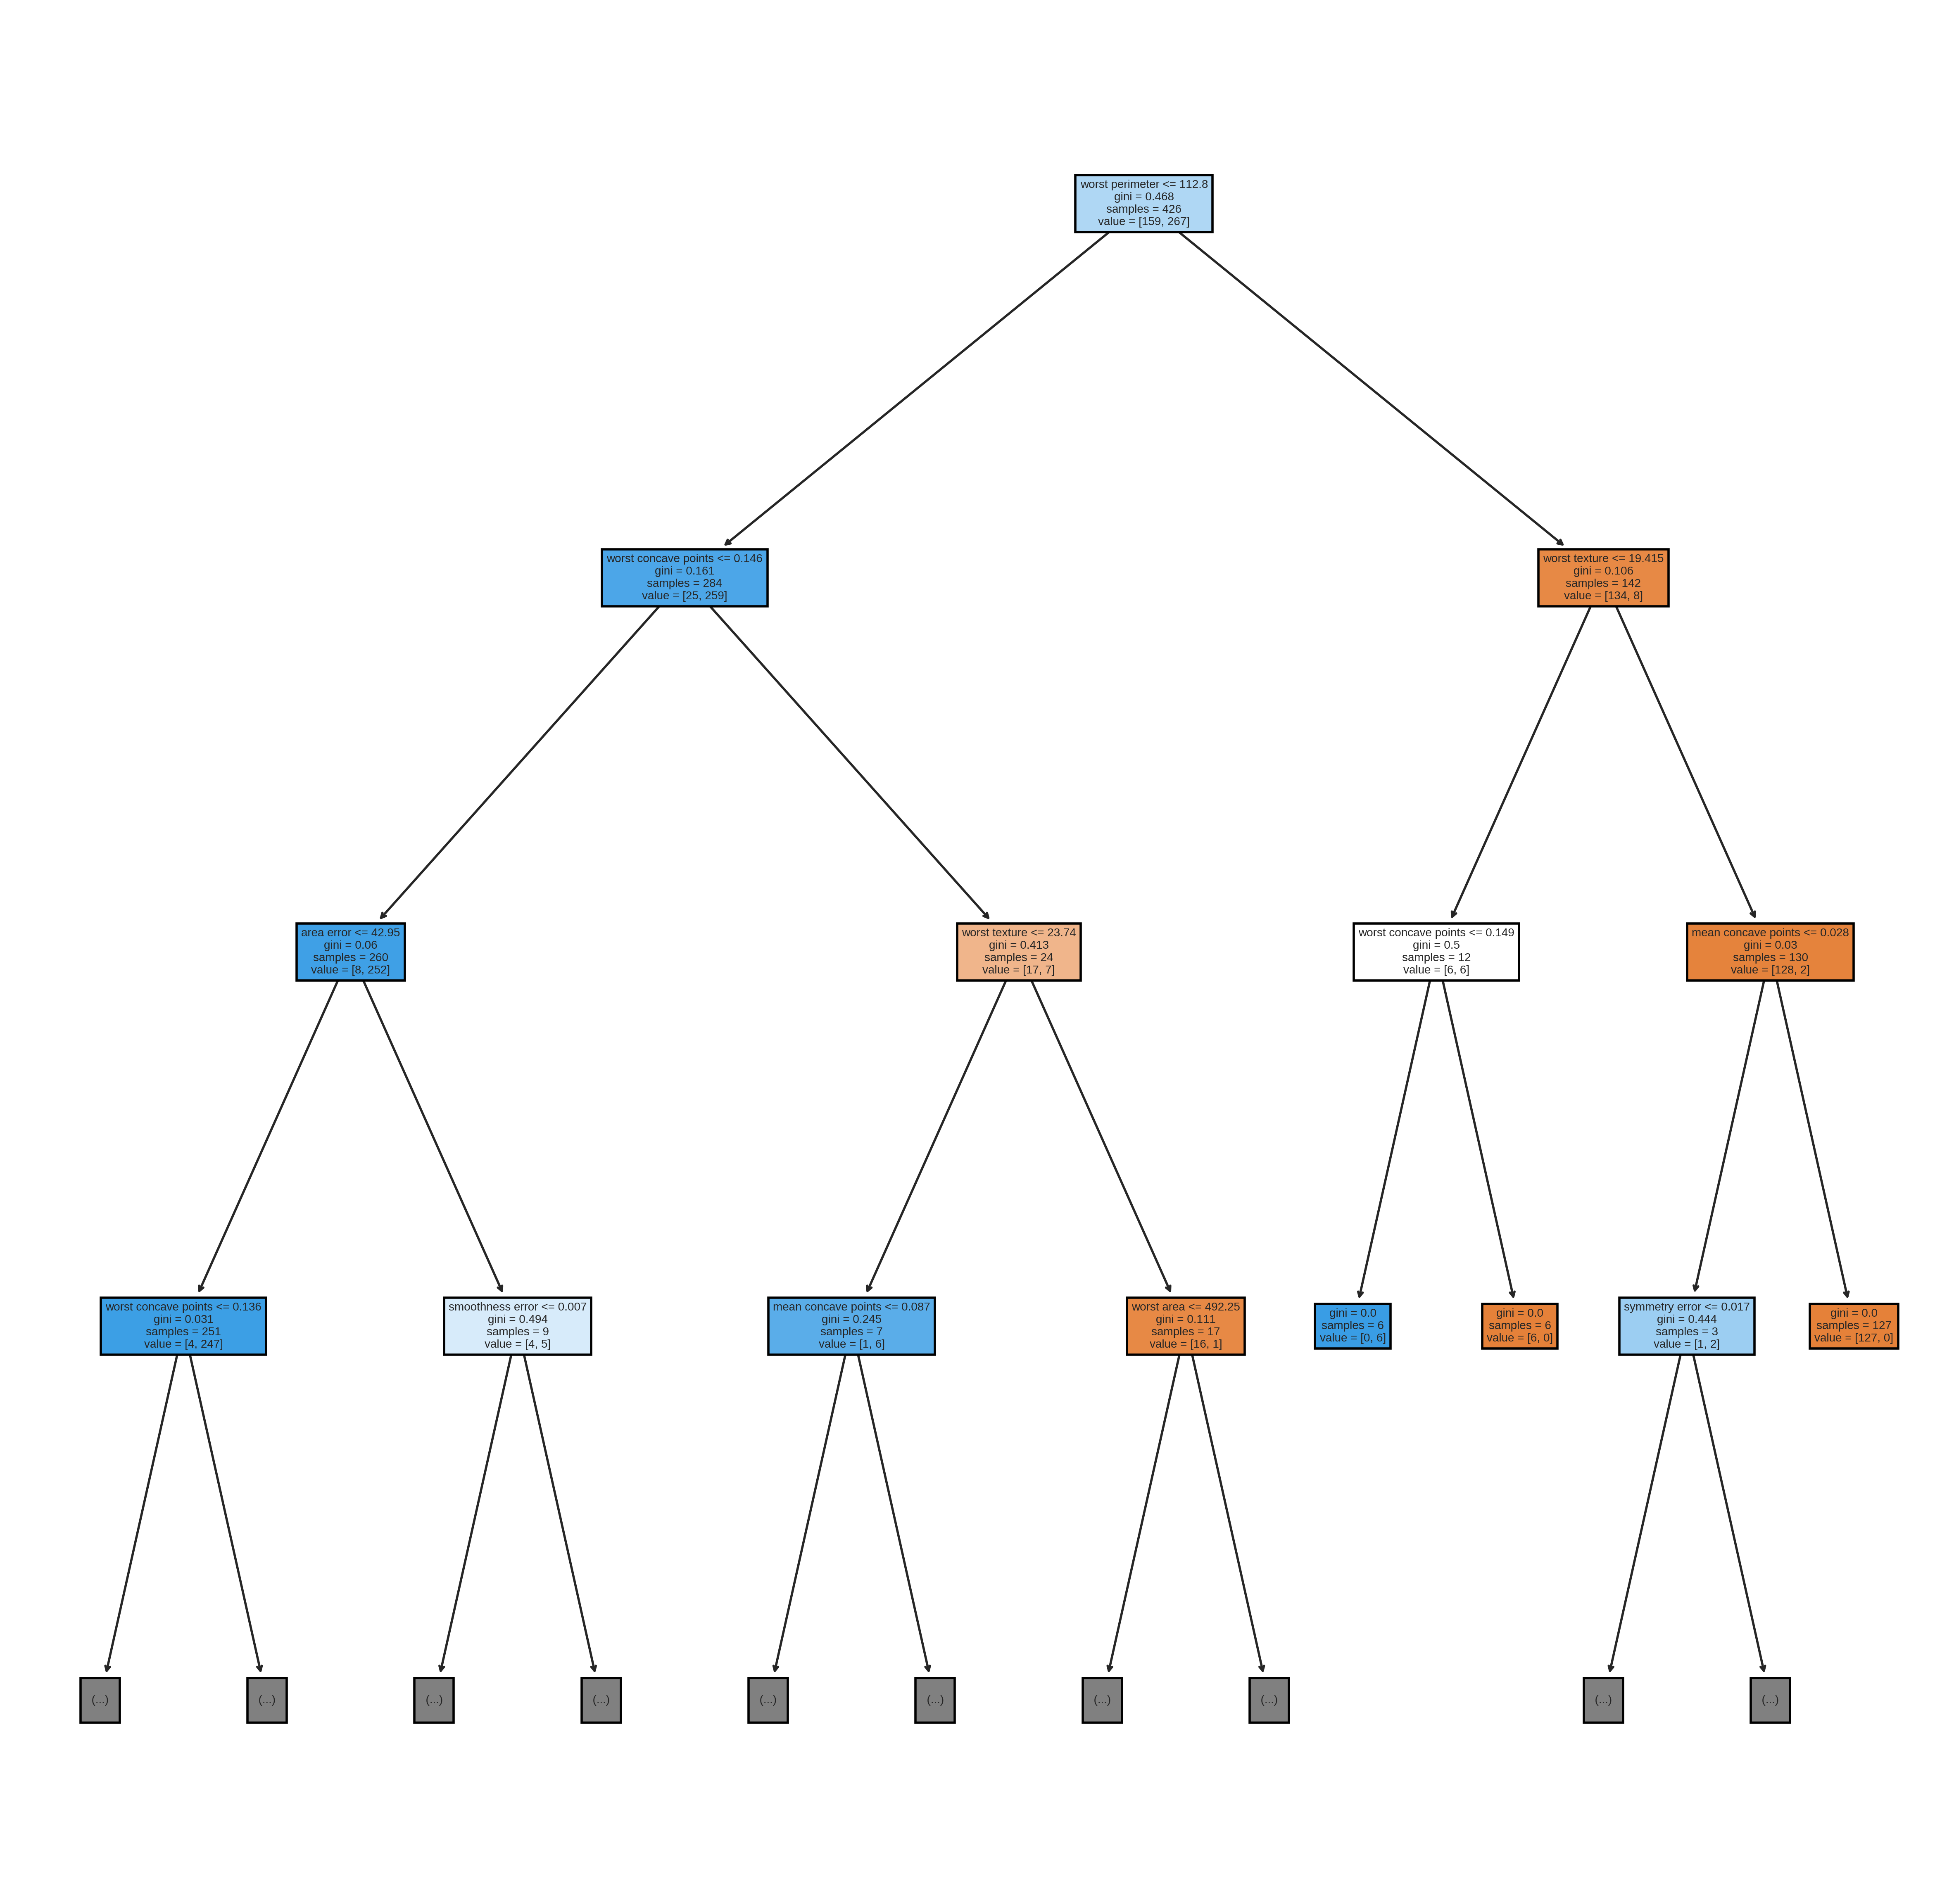

In [28]:
plt.figure(figsize=(15, 15), dpi = 400)
plot_tree(dt_model, max_depth = 3, filled=True, feature_names=feature_name)
plt.show()

### [5] 모델 속성 확인
---
- DT에서 속성들 중에서 속성도 중요도를 감지 가능
- Feature 별로 특성들의 중요도 확인 가능
- 모든 값 합치면 1


In [29]:
dt_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0080277 ,
       0.        , 0.        , 0.02167185, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01600893, 0.02418408,
       0.        , 0.        , 0.        , 0.00668975, 0.        ,
       0.        , 0.06759236, 0.69546322, 0.00944435, 0.        ,
       0.        , 0.        , 0.15091775, 0.        , 0.        ])

In [30]:
dt_model.feature_importances_.argmax()

22

## 앙상블 (Ensemble) - RandomForest 학습 모델
---
- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [32]:
from sklearn.ensemble import RandomForestClassifier

### [1] 모델 학습

In [73]:
rf = RandomForestClassifier(
    n_jobs=4,
    oob_score = True  # 중복허용 랜덤샘플에 포함되지 않는 데이터 -> 검증용 사용
)

rf.fit(train_X, train_y)

RandomForestClassifier(n_jobs=4, oob_score=True)

In [76]:
train_score = rf.score(train_X, train_y)
test_score = rf.score(test_X, test_y)

print("train score: ", rf.score(train_X, train_y))
print("test score: ", rf.score(test_X, test_y))

train score:  1.0
test score:  0.958041958041958


### [2] 모델 속성 확인

In [71]:
rf.feature_importances_

array([0.04968336, 0.00459757, 0.06911191, 0.048591  , 0.00256787,
       0.01496968, 0.05075165, 0.10637296, 0.0007133 , 0.00086307,
       0.01132765, 0.00191047, 0.00716591, 0.02857343, 0.00058013,
       0.00089883, 0.00302712, 0.00180038, 0.00039819, 0.00092896,
       0.14024484, 0.00348123, 0.14148172, 0.11235448, 0.0042054 ,
       0.01736454, 0.02713757, 0.14297446, 0.00387472, 0.00204763])

In [75]:
print(f"base_estimator_ = {rf.base_estimator_}")
print(f"oob_score_ = {rf.oob_score_}")

base_estimator_ = DecisionTreeClassifier()
oob_score_ = 0.9647887323943662


In [77]:
# 특성 중요도 저장,  속성 그래프 출력
rf.feature_importances_

array([0.04948018, 0.01426486, 0.05943018, 0.06249071, 0.00695116,
       0.01537996, 0.04765427, 0.09121735, 0.00427078, 0.00371737,
       0.01274977, 0.00635463, 0.00741683, 0.01767422, 0.00524219,
       0.00319192, 0.01103301, 0.00422032, 0.00579198, 0.00354275,
       0.11982479, 0.0176652 , 0.09220506, 0.14509114, 0.00937607,
       0.02677634, 0.05329448, 0.08259194, 0.01446571, 0.00663482])

In [79]:
rf.n_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


30

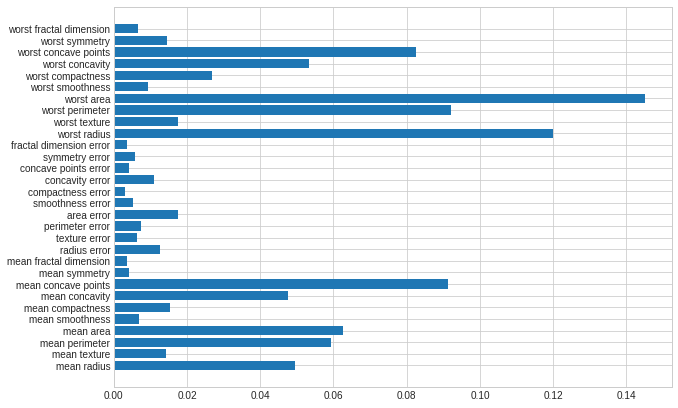

In [88]:
plt.figure(figsize=(10, 7))
plt.barh(y=feature_name, width=rf.feature_importances_)
plt.show()